# Titanic: EDA with Numerica Data

* <b>PassengerID</b>: random ID assigned to passengers
* <b>Pclass</b>: Ticket class of passenger (i.e, 1st class, 2nd class, and 3rd class)
* <b>Name</b>: Name of the passenger
* <b>Sex</b>: Male or Female
* <b>Age</b>: Age of passenger
* <b>SibSp</b>: Number of siblings accompanying passenger
* <b>Parch</b>: Number of parents and children accompanying passenger
* <b>Ticket</b>: Ticket number of passenger
* <b>Fare</b>: Fare paid for ticket
* <b>Cabin</b>: Cabin number of passenger
* <b>Embarked</b>: Port from which passenger embarked
* <b>Survived</b>: 0 and 1 for died and survived, respectively

In [1]:
# Import the libraries for EDA (Exploratory Data Analysis)

# Pandas for multidimensional array
import pandas as pd

# NumPy for numerical operation on multidimensional array
import numpy as np

# Matplotlib and Seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import titanic.csv as a Dataframe
titanicDf = pd.read_csv('./titanic.csv')

In [3]:
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Look at general info about the data
titanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Remove irrelevant and categorical features
featuresRemove = ['PassengerId','Name','Sex','Ticket','Cabin','Embarked']


# axis is 1 for column, 0 for row
# inplace 
# if True, will modify the original Dataframe
# if False, duplicate and modify
# titanicDf_after_change = titanicDf.drop( featuresRemove, axis=1, inplace=False )

titanicDf.drop( featuresRemove, axis=1, inplace=True )

In [6]:
# Preview
titanicDf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [7]:
# Show descriptive statistics for the data
titanicDf.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Breakdown of features for survived vs non-survived
titanicDf.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


<Figure size 432x288 with 0 Axes>

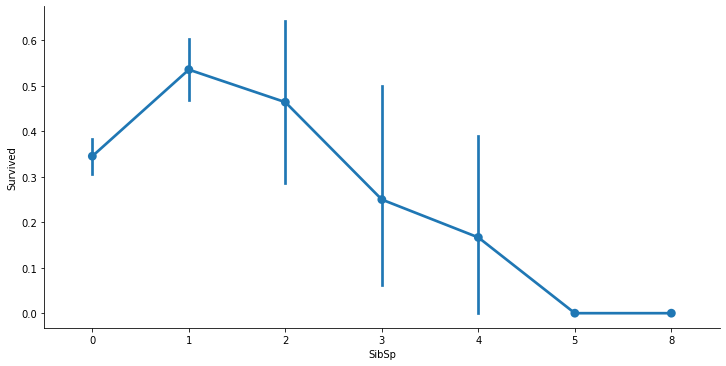

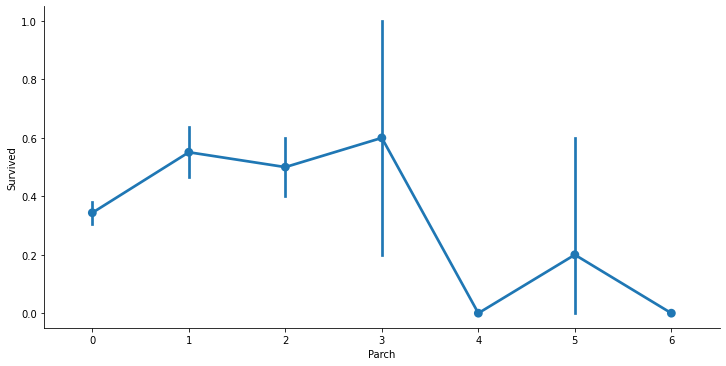

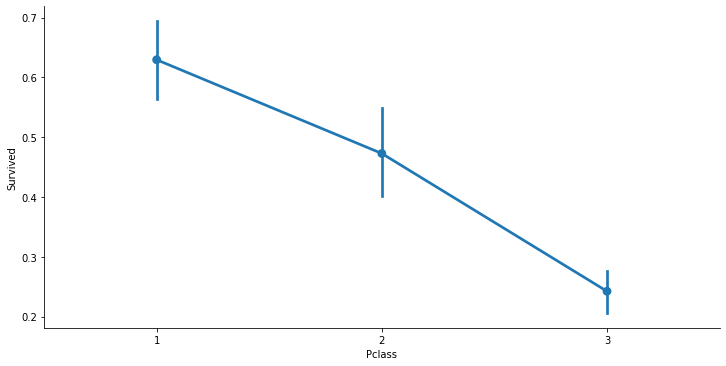

In [9]:
explanatoryFeatures = ['SibSp','Parch','Pclass']

for index, feature in enumerate(explanatoryFeatures):
    # Embed plot inside the notebook
    plt.figure(index)

    # Add a graph inside the plot
    sns.catplot(x=feature, y='Survived', data=titanicDf, kind='point', aspect=2)

In [10]:
titanicDf.groupby('Pclass').describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


In [11]:
cond = titanicDf['Pclass'] == 3
titanicDf[cond].groupby('Survived').describe()

Pclass                                       Age             ...  \
          count mean  std  min  25%  50%  75%  max  count       mean  ...   
Survived                                                              ...   
0         372.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  270.0  26.555556  ...   
1         119.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0   85.0  20.646118  ...   

         Parch        Fare                                            \
           75%  max  count       mean        std  min    25%     50%   
Survived                                                               
0          0.0  6.0  372.0  13.669364  12.118338  0.0  7.750  8.0500   
1          1.0  5.0  119.0  13.694887  10.692993  0.0  7.775  8.5167   

                             
               75%      max  
Survived                     
0         15.13645  69.5500  
1         15.87500  56.4958  

[2 rows x 40 columns]

In [14]:
cond = titanicDf['Pclass'] == 2
titanicDf[cond].groupby('Survived').describe()

Pclass                                      Age             ...  \
          count mean  std  min  25%  50%  75%  max count       mean  ...   
Survived                                                             ...   
0          97.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  90.0  33.544444  ...   
1          87.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  83.0  25.901566  ...   

         Parch       Fare                                                       
           75%  max count       mean        std   min   25%   50%    75%   max  
Survived                                                                        
0          0.0  2.0  97.0  19.412328  15.307175   0.0  11.5  13.0  26.00  73.5  
1          1.0  3.0  87.0  22.055700  10.853502  10.5  13.0  21.0  26.25  65.0  

[2 rows x 40 columns]

In [13]:
cond = titanicDf['Pclass'] == 1
titanicDf[cond].groupby('Survived').describe()

Pclass                                       Age             ...  \
          count mean  std  min  25%  50%  75%  max  count       mean  ...   
Survived                                                              ...   
0          80.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   64.0  43.695312  ...   
1         136.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  122.0  35.368197  ...   

         Parch        Fare                                                    \
           75%  max  count       mean        std      min       25%      50%   
Survived                                                                       
0          0.0  4.0   80.0  64.684008  60.662089   0.0000  27.74270  44.7500   
1          1.0  2.0  136.0  95.608029  85.286820  25.9292  50.98545  77.9583   

                                
                 75%       max  
Survived                        
0          78.937500  263.0000  
1         111.481225  512.3292  

[2 rows x 40 columns]